**1.ImportingLibraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**2.DataCollection**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv(r'/content/drive/MyDrive/oasis/Advertising.csv',index_col='Unnamed: 0')

**3.EDA**

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


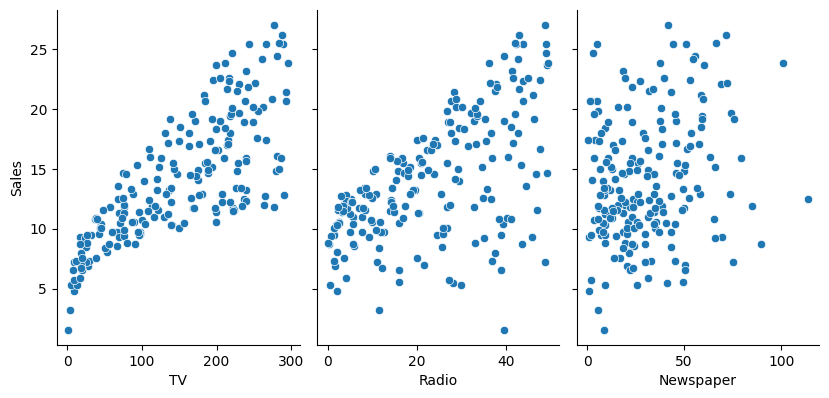

In [9]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7)
plt.show()

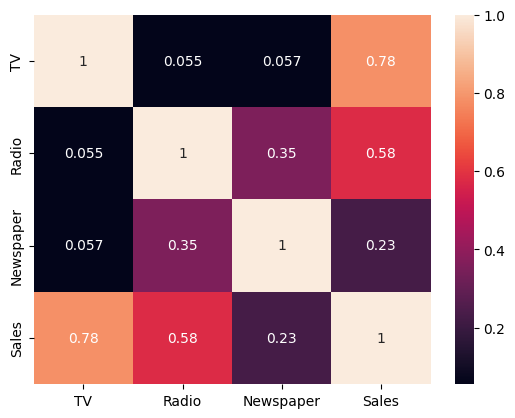

In [10]:
sns.heatmap(data.corr(), annot=True)
plt.show()

**4.Training**

In [11]:
# Define features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**5.Model Evaluation**

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 3.1740973539761033
R2 Score: 0.899438024100912


**6.Testing**

In [16]:
# You can now use the trained model to predict sales for new data
new_data = pd.DataFrame({'TV': [200], 'Radio': [50], 'Newspaper': [10]})
predicted_sales = model.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [21.41233469]
